<a href="https://colab.research.google.com/github/Dondada101/AI-Coursework--2025/blob/main/CAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving Stars.csv to Stars (3).csv
{'Stars (3).csv': b'Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class\r\n3068,0.0024,0.17,16.12,0,Brown Dwarf,Red,M\r\n3042,0.0005,0.1542,16.6,0,Brown Dwarf,Red,M\r\n2600,0.0003,0.102,18.7,0,Brown Dwarf,Red,M\r\n2800,0.0002,0.16,16.65,0,Brown Dwarf,Red,M\r\n1939,0.000138,0.103,20.06,0,Brown Dwarf,Red,M\r\n2840,0.00065,0.11,16.98,0,Brown Dwarf,Red,M\r\n2637,0.00073,0.127,17.22,0,Brown Dwarf,Red,M\r\n2600,0.0004,0.096,17.4,0,Brown Dwarf,Red,M\r\n2650,0.00069,0.11,17.45,0,Brown Dwarf,Red,M\r\n2700,0.00018,0.13,16.05,0,Brown Dwarf,Red,M\r\n3600,0.0029,0.51,10.69,1,Red Dwarf,Red,M\r\n3129,0.0122,0.3761,11.79,1,Red Dwarf,Red,M\r\n3134,0.0004,0.196,13.21,1,Red Dwarf,Red,M\r\n3628,0.0055,0.393,10.48,1,Red Dwarf,Red,M\r\n2650,0.0006,0.14,11.782,1,Red Dwarf,Red,M\r\n3340,0.0038,0.24,13.07,1,Red Dwarf,Red,M\r\n2799,0.0018,0.16,14.79,1,Red Dwarf,Red,M\r\n3692,0.00367,0.47,10.8,1,Red Dwarf,Red,

In [66]:
df=pd.read_csv("Stars.csv")
print(df)
duplicates=df.duplicated().sum()
print(duplicates)
print(df.isnull().sum())
# Example: check for negative or zero temperatures
print(df[df['Temperature (K)'] <= 0])

# Check for negative luminosity or radius
print(df[df['Luminosity (L/Lo)'] <= 0])
print(df[df['Radius (R/Ro)'] <= 0])
# Unique values for categories
print(df['Star category'].unique())
print(df['Star color'].unique())
print(df['Spectral Class'].unique())
# Summary statistics
print(df.describe())


     Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
0               3068           0.002400         0.1700   
1               3042           0.000500         0.1542   
2               2600           0.000300         0.1020   
3               2800           0.000200         0.1600   
4               1939           0.000138         0.1030   
..               ...                ...            ...   
235            38940      374830.000000      1356.0000   
236            30839      834042.000000      1194.0000   
237             8829      537493.000000      1423.0000   
238             9235      404940.000000      1112.0000   
239            37882      294903.000000      1783.0000   

     Absolute magnitude (Mv)  Star type Star category Star color  \
0                      16.12          0   Brown Dwarf        Red   
1                      16.60          0   Brown Dwarf        Red   
2                      18.70          0   Brown Dwarf        Red   
3                      16.65   

📊 Initial number of stars per Star category:
Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64

⚠️ Number of outliers per Star category (from previous step):
Star category
Supergiant       37
Hypergiant       27
Main Sequence     4
Name: count, dtype: int64

✅ Number of stars remaining per Star category if we drop outliers:
Star category
Brown Dwarf       NaN
Hypergiant       13.0
Main Sequence    36.0
Red Dwarf         NaN
Supergiant        3.0
White Dwarf       NaN
Name: count, dtype: float64

🔹 Category: Brown Dwarf | Original stars: 40
Median Luminosity_diff: 0.00, IQR: 0.00, Threshold: 0.00
Kept 34 stars (removed 6)
     Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
0               3068           0.002400         0.1700   
2               2600           0.000300         0.1020   
4               1939           0.000138         0.1030   
5               2840         

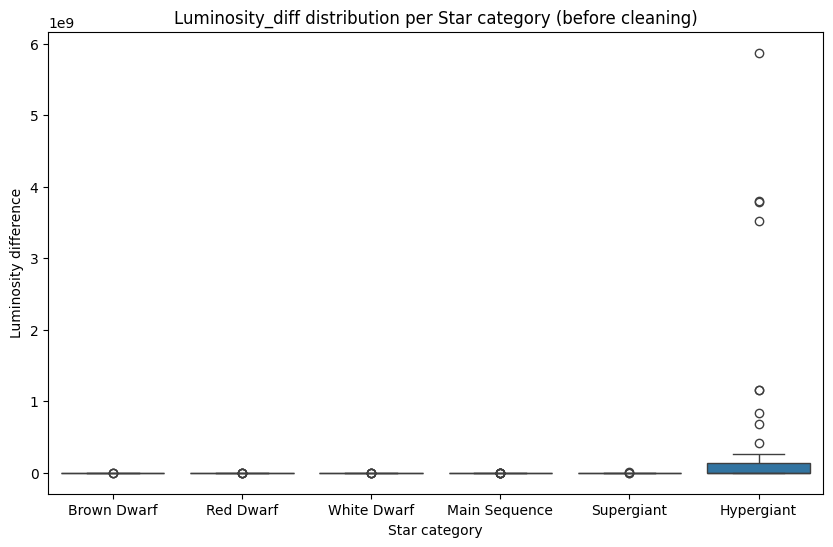

In [67]:
df['Star color'] = df['Star color'].str.lower().str.strip()

# Map only actual unique colors in your dataset
color_map = {
    'red': 'red',
    'blue white': 'blue-white',
    'blue white ': 'blue-white',
    'blue-white': 'blue-white',
    'blue': 'blue',
    'blue ': 'blue',
    'white': 'white',
    'whitish': 'white',
    'yellowish white': 'yellow-white',  # normalize variations
    'white-yellow': 'yellow-white',     # normalize variations
    'yellow-white': 'yellow-white',
    'yellowish': 'yellow',            # keep as its own category
    'orange': 'orange',
    'orange-red': 'orange',
    'pale yellow orange': 'orange'
}

df['Star color'] = df['Star color'].map(color_map)

# 2️⃣ Check for physically impossible values
df = df[(df['Temperature (K)'] > 1000) & (df['Temperature (K)'] < 50000)]
df = df[(df['Radius (R/Ro)'] > 0) & (df['Radius (R/Ro)'] < 2000)]
df = df[df['Luminosity (L/Lo)'] > 0]

# 3️⃣ Calculate expected luminosity using Stefan-Boltzmann law
df['Luminosity_calc'] = (df['Radius (R/Ro)']**2) * (df['Temperature (K)']/5778)**4
df['Luminosity_diff'] = abs(df['Luminosity (L/Lo)'] - df['Luminosity_calc'])

# 4️⃣ Remove rows with extreme luminosity mismatches
threshold = 1e5
outliers = df[df['Luminosity_diff'] > threshold]

# Count of stars per category in the initial dataset
initial_counts = df['Star category'].value_counts()
print("📊 Initial number of stars per Star category:")
print(initial_counts)

# Count of outliers per category
outlier_counts = outliers['Star category'].value_counts()
print("\n⚠️ Number of outliers per Star category (from previous step):")
print(outlier_counts)

# Calculate remaining stars if we drop these outliers
remaining_counts = initial_counts - outlier_counts
print("\n✅ Number of stars remaining per Star category if we drop outliers:")
print(remaining_counts)

# 1️⃣ Category-specific numeric threshold using IQR
cleaned_dfs = []

for category, group in df.groupby('Star category'):
    print(f"\n🔹 Category: {category} | Original stars: {len(group)}")

    # Compute median and IQR for Luminosity_diff
    median_diff = group['Luminosity_diff'].median()
    q1 = group['Luminosity_diff'].quantile(0.25)
    q3 = group['Luminosity_diff'].quantile(0.75)
    iqr = q3 - q1

    # Define threshold
    threshold = median_diff + 1.5 * iqr
    print(f"Median Luminosity_diff: {median_diff:.2f}, IQR: {iqr:.2f}, Threshold: {threshold:.2f}")

    # Keep stars below or equal to threshold
    group_cleaned = group[group['Luminosity_diff'] <= threshold]
    print(f"Kept {len(group_cleaned)} stars (removed {len(group) - len(group_cleaned)})")

    # Show the rows being kept
    print(group_cleaned[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
                         'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color', 'Spectral Class', 'Luminosity_diff']])

    cleaned_dfs.append(group_cleaned)
 # --- Step 4: Combine cleaned categories ---
df_clean = pd.concat(cleaned_dfs).copy()
df_clean.drop(columns=['Luminosity_calc', 'Luminosity_diff'], inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# --- Step 5: Export cleaned dataset ---
df_clean.to_csv("cleaned_star_data.csv", index=False)
print("\n✅ Cleaned dataset exported as 'cleaned_star_data.csv'.")

# --- Step 6: Summary ---
print("\n📊 Remaining stars per Star category:")
print(df_clean['Star category'].value_counts())

# --- Optional: Boxplot visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Star category', y='Luminosity_diff', data=df)
plt.title("Luminosity_diff distribution per Star category (before cleaning)")
plt.ylabel("Luminosity difference")
plt.show()



/tmp/ipython-input-2926906953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfclean, x='Star category', palette='pastel')


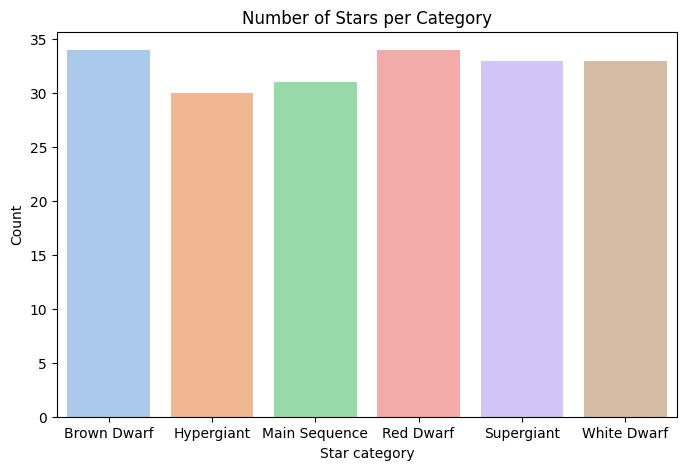

In [68]:
dfclean = pd.read_csv("cleaned_star_data.csv")

#print(df_clean.head())
#print(df_clean.columns)

#Distribution of Star Categories
plt.figure(figsize=(8,5))
sns.countplot(data=dfclean, x='Star category', palette='pastel')
plt.title('Number of Stars per Category')
plt.ylabel('Count')
plt.show()

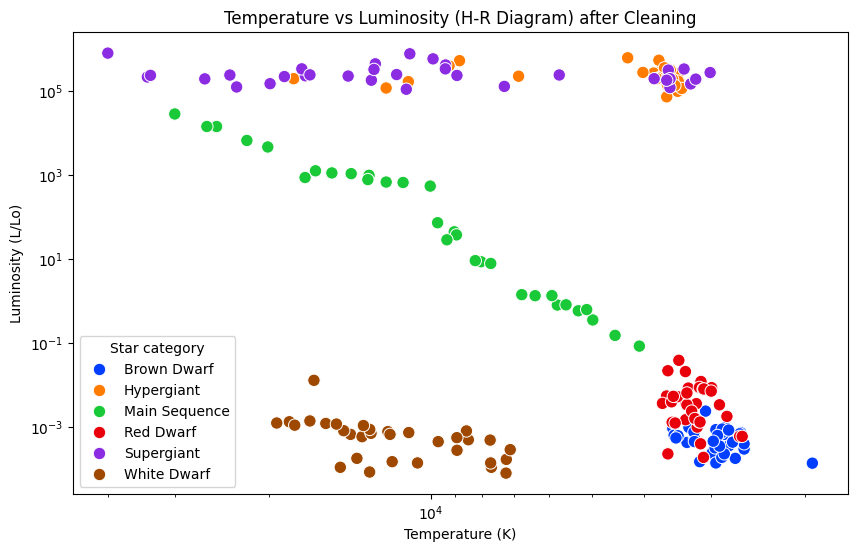

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfclean, x='Temperature (K)', y='Luminosity (L/Lo)',
                hue='Star category', palette='bright', s=80)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()  # HR Diagram style
plt.title('Temperature vs Luminosity (H-R Diagram) after Cleaning')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.show()


/tmp/ipython-input-2505916497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfclean, x='Star color', y='Temperature (K)', palette='coolwarm')


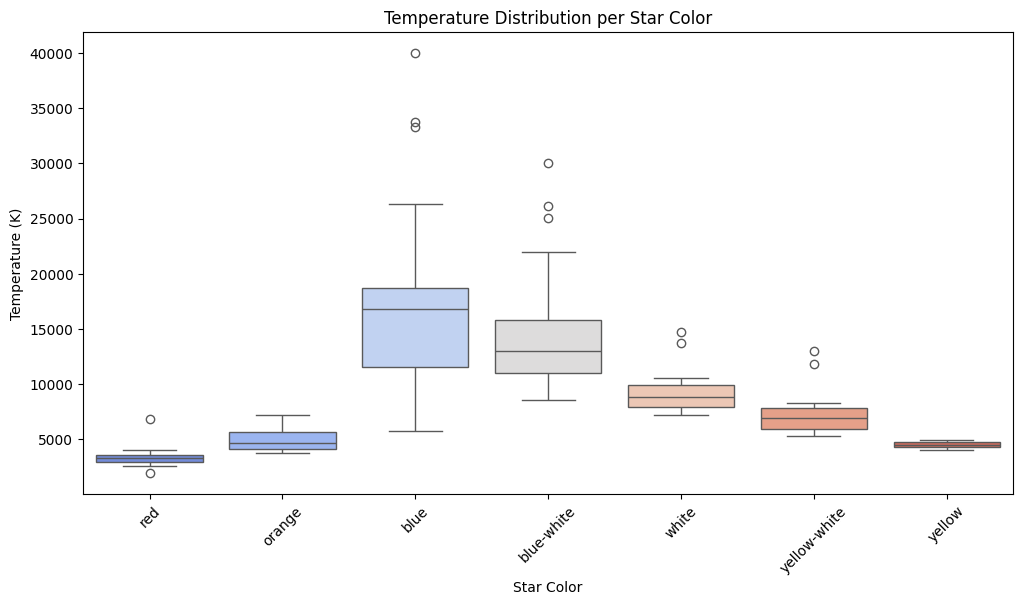

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dfclean, x='Star color', y='Temperature (K)', palette='coolwarm')
plt.title('Temperature Distribution per Star Color')
plt.xlabel('Star Color')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.show()


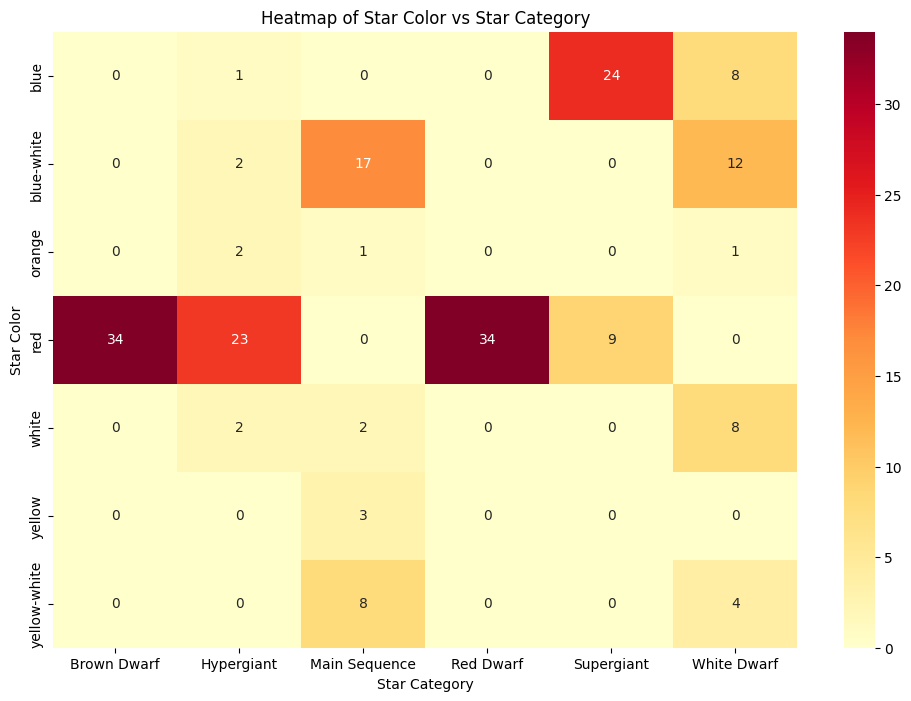

In [71]:
# Pivot table: rows = Star color, columns = Star category, values = count
color_category_counts = dfclean.pivot_table(
    index='Star color',
    columns='Star category',
    values='Temperature (K)',  # can use any column
    aggfunc='count'
)

# Convert to integers
color_category_counts = color_category_counts.fillna(0).astype(int)

plt.figure(figsize=(12,8))
sns.heatmap(color_category_counts, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Star Color vs Star Category')
plt.xlabel('Star Category')
plt.ylabel('Star Color')
plt.show()

Counts per color:
 Star color
red             100
blue             33
blue-white       31
yellow-white     12
white            12
orange            4
yellow            3
Name: count, dtype: int64
Dropping color(s) with fewer than 2 stars: []
Remaining counts per color:
 Star color
red             100
blue             33
blue-white       31
yellow-white     12
white            12
orange            4
yellow            3
Name: count, dtype: int64


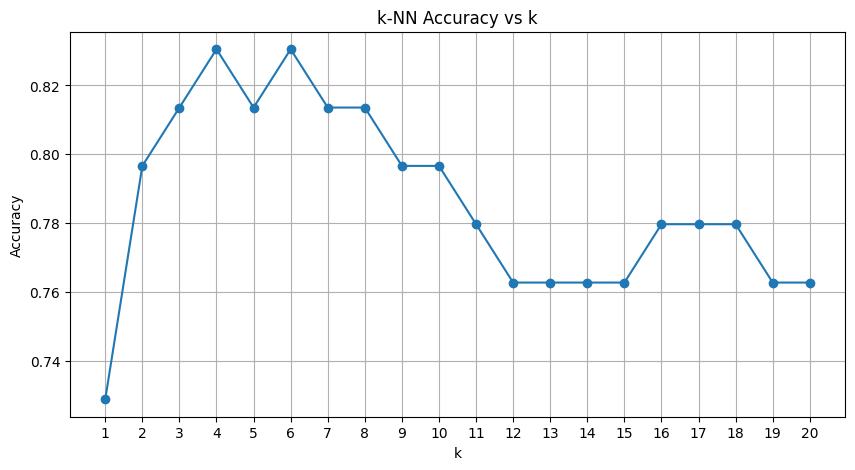

Optimal k: 4, Accuracy: 0.8305
Classification Report:
              precision    recall  f1-score   support

        blue       0.82      0.90      0.86        10
  blue-white       0.64      0.78      0.70         9
      orange       0.00      0.00      0.00         1
         red       0.97      1.00      0.98        30
       white       0.50      0.25      0.33         4
      yellow       0.00      0.00      0.00         1
yellow-white       0.67      0.50      0.57         4

    accuracy                           0.83        59
   macro avg       0.51      0.49      0.49        59
weighted avg       0.81      0.83      0.81        59



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


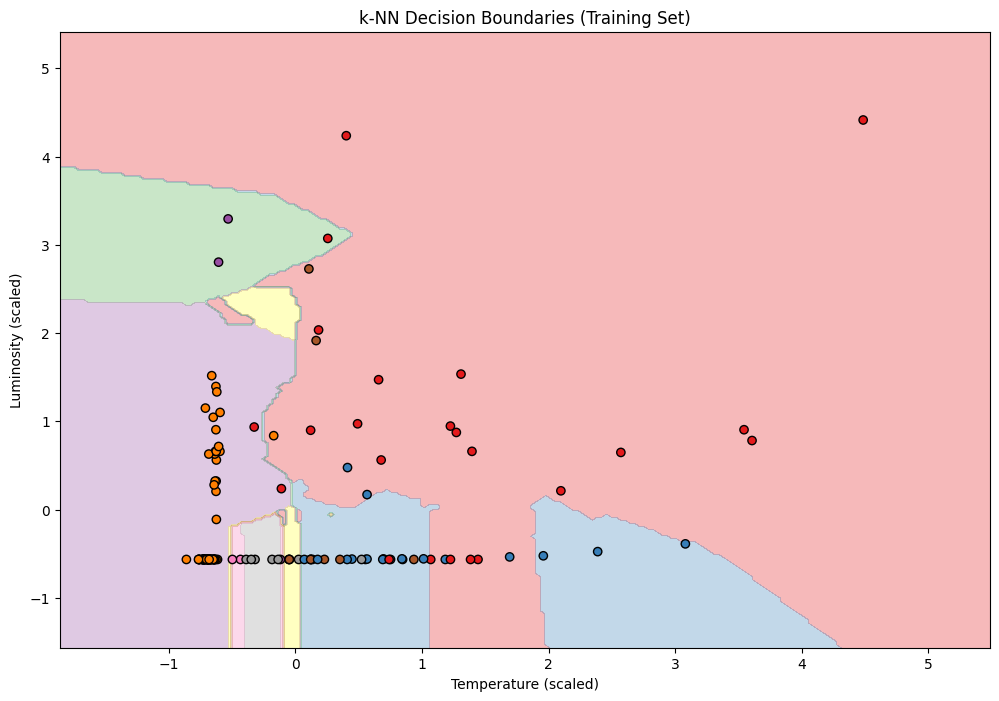

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2️⃣ Load cleaned dataset
df = pd.read_csv("cleaned_star_data.csv")

# Count the occurrences of each Star color
color_counts = df['Star color'].value_counts()
print("Counts per color:\n", color_counts)

# Drop all colors with fewer than 2 samples
rare_colors = color_counts[color_counts < 2].index
print(f"Dropping color(s) with fewer than 2 stars: {list(rare_colors)}")
df_clean = df[~df['Star color'].isin(rare_colors)].copy()

# Verify the remaining counts
print("Remaining counts per color:\n", df_clean['Star color'].value_counts())

#  Select features and target
X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star color']

#  Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Scale features (important for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k using a simple loop
k_range = range(1, 21)  # try k from 1 to 20
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

#  Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("k-NN Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

#  Choose optimal k (highest accuracy)
best_k = k_range[np.argmax(accuracies)]
print(f"Optimal k: {best_k}, Accuracy: {max(accuracies):.4f}")

#   Train final model with optimal k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_final_pred = knn_final.predict(X_test_scaled)

#  Evaluate
print("Classification Report:")
print(classification_report(y_test, y_final_pred, target_names=le.classes_))

# Optional: Visualize decision boundaries in 2D
plt.figure(figsize=(12, 8))
# create a mesh grid
h_temp = np.linspace(X_train_scaled[:,0].min()-1, X_train_scaled[:,0].max()+1, 200)
h_lum = np.linspace(X_train_scaled[:,1].min()-1, X_train_scaled[:,1].max()+1, 200)
xx, yy = np.meshgrid(h_temp, h_lum)
Z = knn_final.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap='Set1', edgecolor='k')
plt.xlabel('Temperature (scaled)')
plt.ylabel('Luminosity (scaled)')
plt.title('k-NN Decision Boundaries (Training Set)')
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("cleaned_star_data.csv")

# Select features and target
X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star type']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Convert numeric labels to original class names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))


Accuracy: 0.847457627118644
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.85      0.79      0.81        14
           2       1.00      1.00      1.00         9
           3       1.00      0.92      0.96        12
           4       0.75      0.75      0.75         8
           5       0.71      0.71      0.71         7

    accuracy                           0.85        59
   macro avg       0.84      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_dt = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Predictions
y_pred = best_dt.predict(X_test)

# Convert numeric labels to original class names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Evaluate
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))


Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8813559322033898
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.92      0.79      0.85        14
           2       1.00      1.00      1.00         9
           3       1.00      0.92      0.96        12
           4       0.86      0.75      0.80         8
           5       0.75      0.86      0.80         7

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.89      0.88      0.88        59

